In [60]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from math import sqrt
import shap

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [62]:
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 

In [63]:
def wmape(actual, forecast):
    # we take two series and calculate an output a wmape from it, not to be used in a grouping function

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

In [64]:
def prepare_data(df):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, target = df['phone_size'], df['month'], df['year'], df['week_of_year'], df['quarter'], df['weeks_since_release'], df['holiday'], df['default'], df['mini'], df['pro'], df['pro max'], df['claim'] 
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, target = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(x5), np.array(x6), np.array(x7), np.array(x8), np.array(x9), np.array(x10), np.array(x11), np.array(target)
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, target = x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), x4.reshape(-1, 1), x5.reshape(-1, 1), x6.reshape(-1, 1), x7.reshape(-1, 1), x8.reshape(-1, 1), x9.reshape(-1, 1), x10.reshape(-1, 1), x11.reshape(-1, 1),target.reshape(-1, 1)
    features = np.concatenate((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11,), axis = 1)
    
    return features, target

In [65]:
df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iphone13_tree.csv', parse_dates=['weeks_monday'])

In [66]:
df = df.sort_values('weeks_since_release')

In [67]:
features, target = prepare_data(df)

In [68]:
X_train, X_test, y_train, y_test = features[:-50], features[-50:], target[:-50], target[-50:]

In [69]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=42)

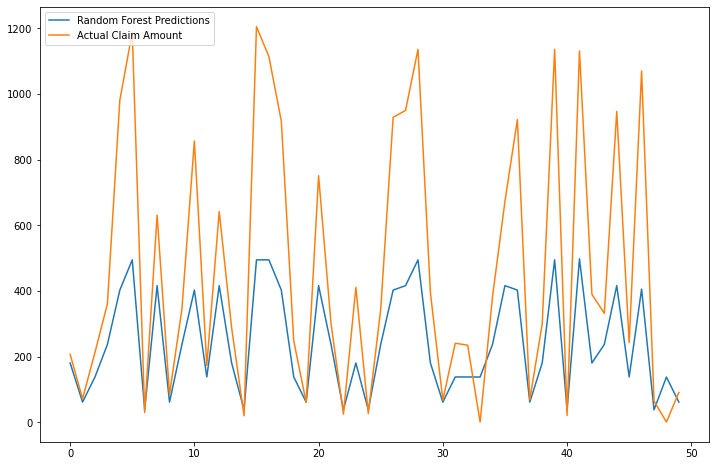

In [70]:
pred = rf_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label = "Random Forest Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

In [71]:
rmse_rf = sqrt(mean_squared_error(pred, y_test))
print("Mean sqaured error for Random Forest model is: ", rmse_rf)

Mean sqaured error for Random Forest model is:  333.36978361573205


In [72]:
y_test_series = pd.Series(y_test.ravel())
pred_series = pd.Series(pred.ravel())
wmape_score = wmape(y_test_series, pred_series)
print("WMAPE: {:.2%}".format(wmape_score))

WMAPE: 50.84%


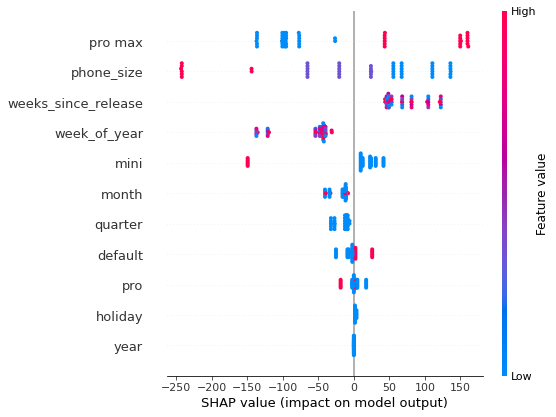

In [73]:
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test)

X_test_df = pd.DataFrame(X_test, columns=['phone_size', 'month', 'year', 'week_of_year', 'quarter', 'weeks_since_release', 'holiday', 'default', 'mini', 'pro', 'pro max'])

shap.summary_plot(shap_values, X_test_df)

In [74]:
iphone14 = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iphone14_tree.csv', parse_dates=['weeks_monday'])

In [75]:
iphone14 = iphone14.sort_values('weeks_since_release')

In [76]:
X_test, y_test = prepare_data(iphone14)

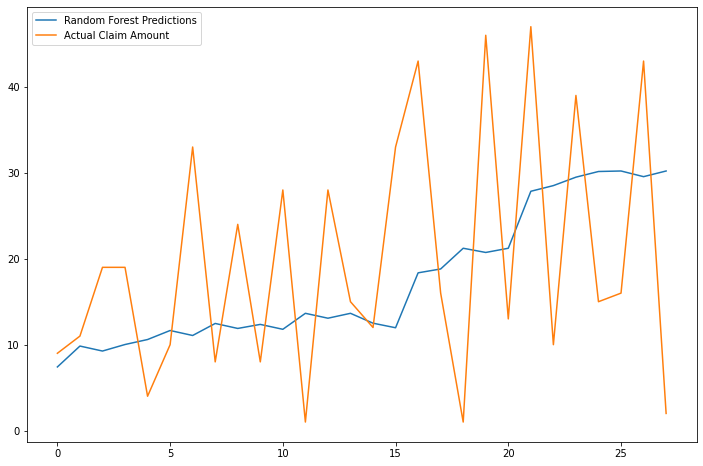

In [77]:
pred = rf_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label = "Random Forest Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

In [78]:
rmse_rf = sqrt(mean_squared_error(pred, y_test))
print("Mean sqaured error for Random Forest model is: ", rmse_rf)
y_test_series = pd.Series(y_test.ravel())
pred_series = pd.Series(pred.ravel())
wmape_score = wmape(y_test_series, pred_series)
print("WMAPE: {:.2%}".format(wmape_score))

Mean sqaured error for Random Forest model is:  14.540472334634996
WMAPE: 61.23%


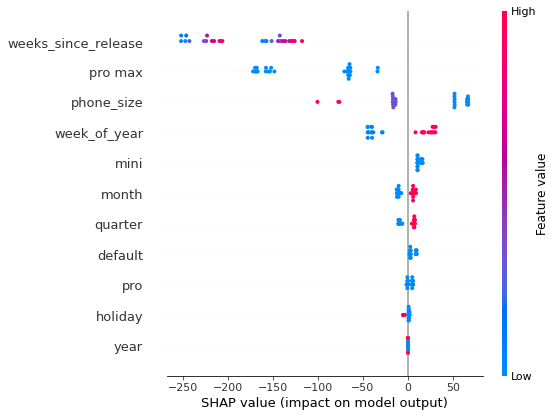

In [79]:
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test)

X_test_df = pd.DataFrame(X_test, columns=['phone_size', 'month', 'year', 'week_of_year', 'quarter', 'weeks_since_release', 'holiday', 'default', 'mini', 'pro', 'pro max'])

shap.summary_plot(shap_values, X_test_df)

In [80]:
df['phone_size'], df['month'], df['year'], df['week_of_year'], df['quarter'], 
df['weeks_since_release'], df['holiday'], 
df['default'], df['mini'], df['pro'], df['pro max'], df['claim'] 

(0      1
 1      1
 2      1
 3      1
 4      1
 5      1
 6      1
 7      1
 8      1
 9      1
 10     1
 11     1
 12     0
 13     1
 14     0
 15     0
 16     1
 17     1
 18     0
 20     0
 19     1
 21     0
 22     0
 23     1
 24     1
 25     0
 26     0
 29     0
 27     0
 28     1
 32     0
 30     1
 31     0
 33     1
 34     0
 35     0
 36     0
 38     1
 37     0
 39     0
 44     0
 43     0
 45     1
 41     0
 40     0
 42     1
 46     1
 47     0
 48     0
 49     0
 50     0
 51     1
 57     1
 56     0
 55     0
 53     0
 52     0
 54     1
 58     0
 59     1
 60     0
 61     0
 62     0
 63     1
 71     0
 70     1
 69     1
 68     0
 66     0
 65     0
 64     0
 67     0
 78     0
 77     1
 76     0
 79     0
 74     0
 73     0
 72     1
 75     0
 80     0
 81     0
 82     1
 83     0
 84     0
 85     0
 86     0
 87     1
 94     1
 95     0
 92     0
 93     0
 90     0
 88     1
 91     0
 89     0
 103    1
 96     0
 97     0
 98     0


In [81]:
df = pd.read_excel('/data/p_dsi/teams2023/team2/asurion_data/Asurion_data_additional.xlsx')

In [82]:
df2 = df[(df['phone model'] == 'apple iphone 14') | (df['phone model'] == 'apple iphone 14 pro max')]
df2_grouped = df2.groupby(['weeks_monday', 'phone model', 'phone size'])['claim'].sum().reset_index()
df2_grouped

,weeks_monday,phone model,phone size,claim
0,2023-02-06,apple iphone 14,128gb,43
1,2023-02-06,apple iphone 14,256gb,16
2,2023-02-06,apple iphone 14,512gb,2
3,2023-02-06,apple iphone 14 pro max,128gb,182
4,2023-02-13,apple iphone 14,128gb,51
5,2023-02-13,apple iphone 14,256gb,15
6,2023-02-13,apple iphone 14 pro max,128gb,264
7,2023-02-20,apple iphone 14,128gb,54
8,2023-02-20,apple iphone 14,256gb,14
9,2023-02-20,apple iphone 14 pro max,128gb,282


In [90]:
data = [
    {'phone_size': 128, 'month': 2, 'year': 2023, 'week_of_year': 6, 'quarter': 1, 
     'weeks_since_release': 20, 'holiday': 0, 'default': 1, 'mini': 0, 'pro': 0, 
     'pro max': 0, 'claim': 43},
    {'phone_size': 256, 'month': 2, 'year': 2023, 'week_of_year': 6, 'quarter': 1, 
     'weeks_since_release': 20, 'holiday': 0, 'default': 1, 'mini': 0, 'pro': 0, 
     'pro max': 0, 'claim': 16},
    {'phone_size': 512, 'month': 2, 'year': 2023, 'week_of_year': 6, 'quarter': 1, 
     'weeks_since_release': 20, 'holiday': 0, 'default': 1, 'mini': 0, 'pro': 0, 
     'pro max': 0, 'claim': 2},
    {'phone_size': 128, 'month': 2, 'year': 2023, 'week_of_year': 6, 'quarter': 1, 
     'weeks_since_release': 20, 'holiday': 0, 'default': 0, 'mini': 0, 'pro': 0, 
     'pro max': 1, 'claim': 182},
    {'phone_size': 128, 'month': 2, 'year': 2023, 'week_of_year': 7, 'quarter': 1, 
     'weeks_since_release': 21, 'holiday': 0, 'default': 1, 'mini': 0, 'pro': 0, 
     'pro max': 0, 'claim': 51},
    {'phone_size': 256, 'month': 2, 'year': 2023, 'week_of_year': 7, 'quarter': 1, 
     'weeks_since_release': 21, 'holiday': 0, 'default': 1, 'mini': 0, 'pro': 0, 
     'pro max': 0, 'claim': 15},
    {'phone_size': 128, 'month': 2, 'year': 2023, 'week_of_year': 7, 'quarter': 1, 
     'weeks_since_release': 21, 'holiday': 0, 'default': 0, 'mini': 0, 'pro': 0, 
     'pro max': 1, 'claim': 264},
    {'phone_size': 128, 'month': 2, 'year': 2023, 'week_of_year': 8, 'quarter': 1, 
     'weeks_since_release': 22, 'holiday': 0, 'default': 1, 'mini': 0, 'pro': 0, 
     'pro max': 0, 'claim': 54},
    {'phone_size': 256, 'month': 2, 'year': 2023, 'week_of_year': 8, 'quarter': 1, 
     'weeks_since_release': 22, 'holiday': 0, 'default': 1, 'mini': 0, 'pro': 0, 
     'pro max': 0, 'claim': 14},
    {'phone_size': 128, 'month': 2, 'year': 2023, 'week_of_year': 8, 'quarter': 1, 
     'weeks_since_release': 22, 'holiday': 0, 'default': 0, 'mini': 0, 'pro': 0, 
     'pro max': 1, 'claim': 282},
    {'phone_size': 128, 'month': 2, 'year': 2023, 'week_of_year': 9, 'quarter': 1, 
     'weeks_since_release': 22, 'holiday': 0, 'default': 1, 'mini': 0, 'pro': 0, 
     'pro max': 0, 'claim': 54},
    {'phone_size': 256, 'month': 2, 'year': 2023, 'week_of_year': 9, 'quarter': 1, 
     'weeks_since_release': 23, 'holiday': 0, 'default': 1, 'mini': 0, 'pro': 0, 
     'pro max': 0, 'claim': 15},
    {'phone_size': 128, 'month': 2, 'year': 2023, 'week_of_year': 9, 'quarter': 1, 
     'weeks_since_release': 23, 'holiday': 0, 'default': 0, 'mini': 0, 'pro': 0, 
     'pro max': 1, 'claim': 285},
    {'phone_size': 256, 'month': 2, 'year': 2023, 'week_of_year': 9, 'quarter': 1, 
     'weeks_since_release': 23, 'holiday': 0, 'default': 0, 'mini': 0, 'pro': 0, 
     'pro max': 1, 'claim': 75}
]

dfiphone14feb = pd.DataFrame(data)
dfiphone14feb 

,phone_size,month,year,week_of_year,quarter,weeks_since_release,holiday,default,mini,pro,pro max,claim
0,128,2,2023,6,1,20,0,1,0,0,0,43
1,256,2,2023,6,1,20,0,1,0,0,0,16
2,512,2,2023,6,1,20,0,1,0,0,0,2
3,128,2,2023,6,1,20,0,0,0,0,1,182
4,128,2,2023,7,1,21,0,1,0,0,0,51
5,256,2,2023,7,1,21,0,1,0,0,0,15
6,128,2,2023,7,1,21,0,0,0,0,1,264
7,128,2,2023,8,1,22,0,1,0,0,0,54
8,256,2,2023,8,1,22,0,1,0,0,0,14
9,128,2,2023,8,1,22,0,0,0,0,1,282


In [91]:
X_test, y_test = prepare_data(dfiphone14feb)

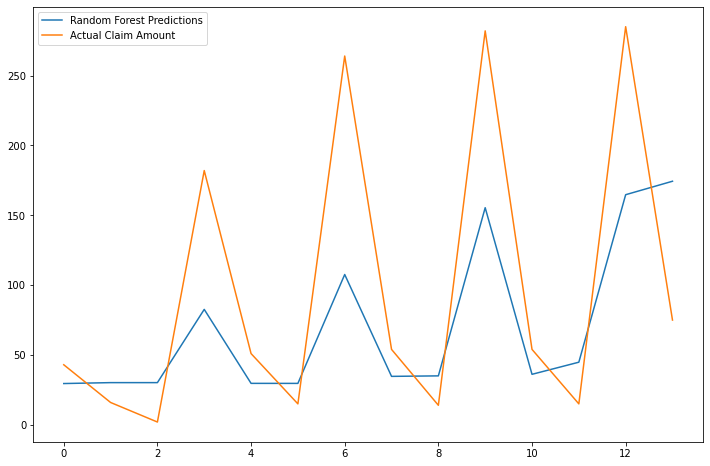

In [92]:
pred = rf_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label = "Random Forest Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

In [93]:
rmse_rf = sqrt(mean_squared_error(pred, y_test))
print("Mean sqaured error for Random Forest model is: ", rmse_rf)
y_test_series = pd.Series(y_test.ravel())
pred_series = pd.Series(pred.ravel())
wmape_score = wmape(y_test_series, pred_series)
print("WMAPE: {:.2%}".format(wmape_score))

Mean sqaured error for Random Forest model is:  74.91369510500543
WMAPE: 57.83%


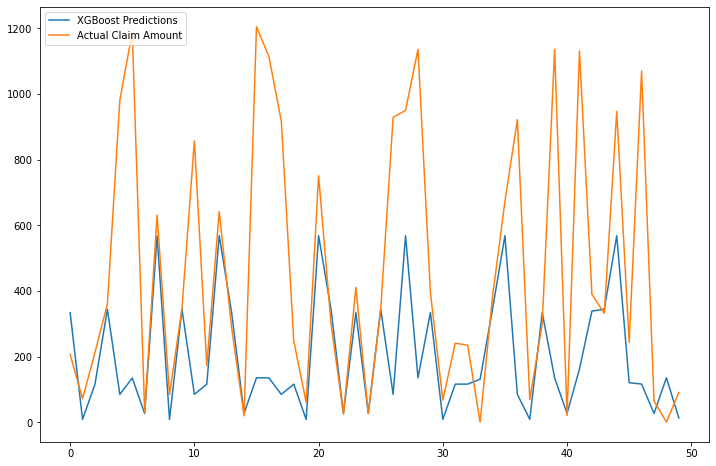

Mean squared error for XGBoost model is:  470.6429050123116
WMAPE: 61.38%


In [94]:
import xgboost as xgb

df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iphone13_tree.csv', parse_dates=['weeks_monday'])
df = df.sort_values('weeks_since_release')

features, target = prepare_data(df)
X_train, X_test, y_train, y_test = features[:-50], features[-50:], target[:-50], target[-50:]

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)

pred = xgb_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label = "XGBoost Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

rmse_xgb = sqrt(mean_squared_error(pred, y_test))
print("Mean squared error for XGBoost model is: ", rmse_xgb)
y_test_series = pd.Series(y_test.ravel())
pred_series = pd.Series(pred.ravel())
wmape_score = wmape(y_test_series, pred_series)
print("WMAPE: {:.2%}".format(wmape_score))

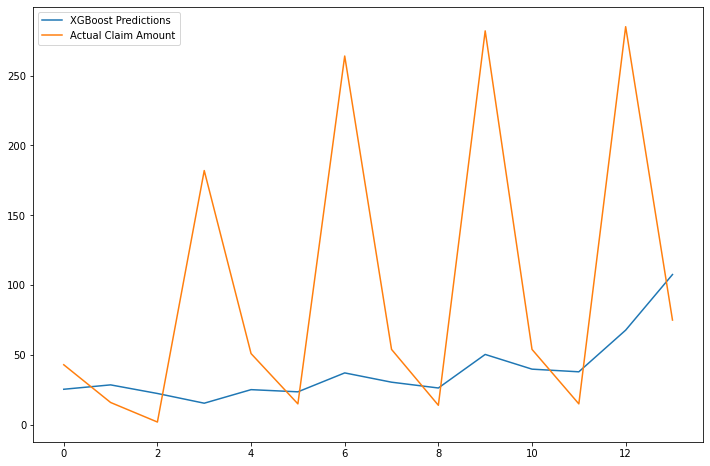

In [95]:
X_test, y_test = prepare_data(dfiphone14feb)
pred = xgb_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label = "XGBoost Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

In [96]:
rmse_rf = sqrt(mean_squared_error(pred, y_test))
print("Mean sqaured error for XG Boost model is: ", rmse_rf)
y_test_series = pd.Series(y_test.ravel())
pred_series = pd.Series(pred.ravel())
wmape_score = wmape(y_test_series, pred_series)
print("WMAPE: {:.2%}".format(wmape_score))

Mean sqaured error for XG Boost model is:  114.68434682571399
WMAPE: 76.39%
